In [19]:
import pandas as pd

Import Pandas library

In [20]:
df = pd.read_csv("EuCitiesTemperatures.csv")
print(df)

          city         country  population   EU coastline  latitude  \
0      Elbasan         Albania        2.90   no       yes     41.12   
1      Andorra         Andorra        0.07   no        no     42.50   
2    Innsbruck         Austria        8.57  yes        no       NaN   
3         Graz         Austria        8.57  yes        no     47.08   
4         Linz         Austria        8.57  yes        no     48.32   
..         ...             ...         ...  ...       ...       ...   
208  Edinburgh  United Kingdom       65.11  yes       yes     55.95   
209     Exeter  United Kingdom       65.11  yes       yes     50.70   
210  Inverness  United Kingdom       65.11  yes       yes       NaN   
211    Glasgow  United Kingdom       65.11  yes       yes     55.87   
212    Swansea  United Kingdom       65.11  yes       yes     51.63   

     longitude  temperature  
0        20.08        15.18  
1         1.52          NaN  
2        11.41         4.54  
3          NaN         6.91

Loads in EuCitiesTemperatures.csv as a Pandas DataFrame

In [21]:
df['latitude'] = df.groupby('country')['latitude'].transform(lambda x: x.fillna(round(x.mean(), 2)))
df['longitude'] = df.groupby('country')['longitude'].transform(lambda x: x.fillna(round(x.mean(), 2)))
print(df)

          city         country  population   EU coastline  latitude  \
0      Elbasan         Albania        2.90   no       yes     41.12   
1      Andorra         Andorra        0.07   no        no     42.50   
2    Innsbruck         Austria        8.57  yes        no     47.85   
3         Graz         Austria        8.57  yes        no     47.08   
4         Linz         Austria        8.57  yes        no     48.32   
..         ...             ...         ...  ...       ...       ...   
208  Edinburgh  United Kingdom       65.11  yes       yes     55.95   
209     Exeter  United Kingdom       65.11  yes       yes     50.70   
210  Inverness  United Kingdom       65.11  yes       yes     53.55   
211    Glasgow  United Kingdom       65.11  yes       yes     55.87   
212    Swansea  United Kingdom       65.11  yes       yes     51.63   

     longitude  temperature  
0        20.08        15.18  
1         1.52          NaN  
2        11.41         4.54  
3        14.02         6.91

We start off by grouping the country column by the longitude/latitude columns, becuase thats all we are working with.

The Lambda fills the non missing values with mean rounded to 2nd decimal

In [22]:
subset_of_cities=df[(df['latitude'] >= 40) & (df['latitude'] <= 60) & (df['longitude'] >= 15) & (df['longitude'] <= 30)]
num_countries=subset_of_cities['country'].value_counts()
max_count = num_countries.max()
max_countries = num_countries[num_countries == max_count]
print(max_countries)

Romania    9
Poland     9
Name: country, dtype: int64


First we filter of our dataset by latitude and longitude

Then we created num_countries which stores country and number of citys

Then we find max amount of cities in a country

and Max countries outputs only countries with max cities

In [23]:
average_temperatures = df.groupby(['EU', 'coastline'])['temperature'].transform('mean')
df['temperature'].fillna(average_temperatures, inplace=True)
print(df)

          city         country  population   EU coastline  latitude  \
0      Elbasan         Albania        2.90   no       yes     41.12   
1      Andorra         Andorra        0.07   no        no     42.50   
2    Innsbruck         Austria        8.57  yes        no     47.85   
3         Graz         Austria        8.57  yes        no     47.08   
4         Linz         Austria        8.57  yes        no     48.32   
..         ...             ...         ...  ...       ...       ...   
208  Edinburgh  United Kingdom       65.11  yes       yes     55.95   
209     Exeter  United Kingdom       65.11  yes       yes     50.70   
210  Inverness  United Kingdom       65.11  yes       yes     53.55   
211    Glasgow  United Kingdom       65.11  yes       yes     55.87   
212    Swansea  United Kingdom       65.11  yes       yes     51.63   

     longitude  temperature  
0        20.08    15.180000  
1         1.52     7.481538  
2        11.41     4.540000  
3        14.02     6.910000

Fills in the missing temperature values by the average temperature value of the similar region type

In [24]:
import matplotlib.pyplot as plt

Import matplotlib

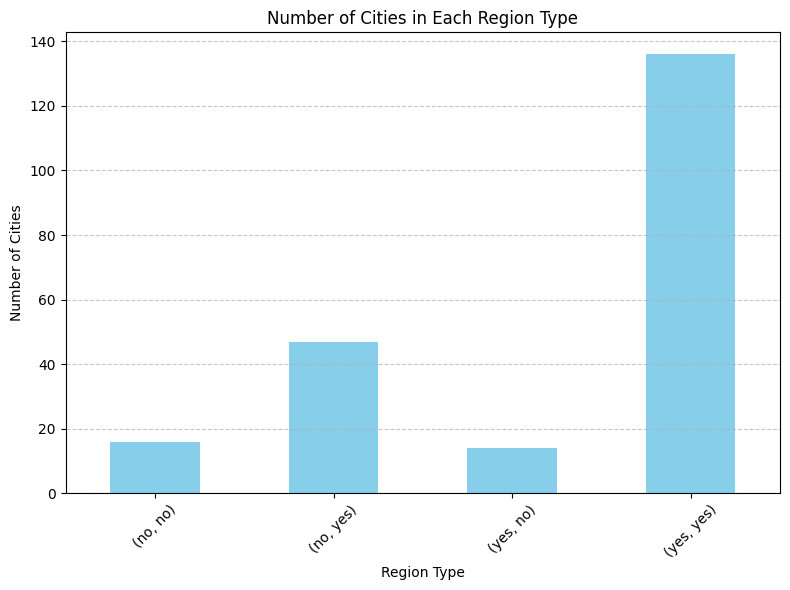

In [26]:
region_counts = df.groupby(['EU', 'coastline']).size()
plt.figure(figsize=(8, 6))
region_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Cities in Each Region Type')
plt.xlabel('Region Type')
plt.ylabel('Number of Cities')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3

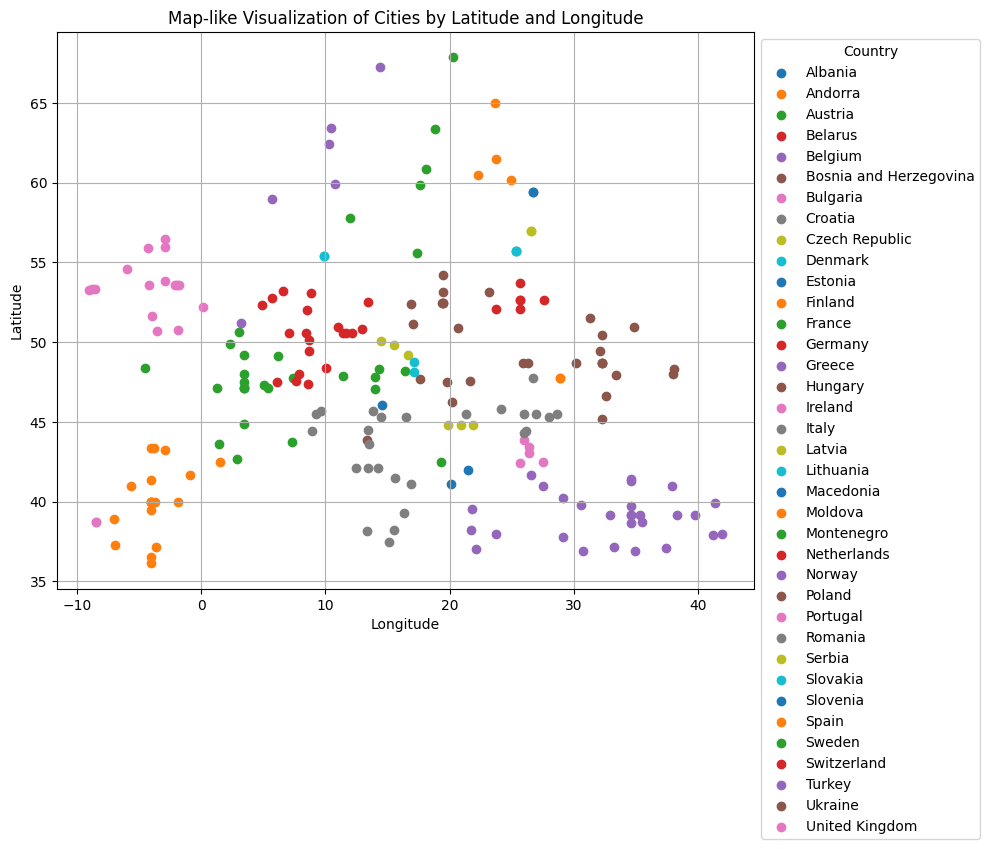

In [27]:
unique_countries = df['country'].unique()


plt.figure(figsize=(10, 8))
for country in unique_countries:
    country_cities = df[df['country'] == country]
    plt.scatter(country_cities['longitude'], country_cities['latitude'], label=country)
plt.title('Map-like Visualization of Cities by Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

Scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color

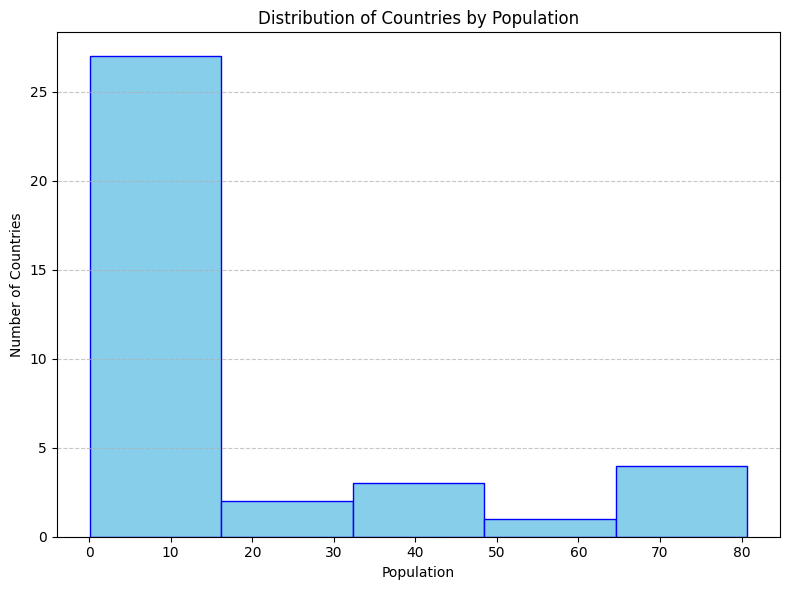

In [28]:
unique_country_populations = df.drop_duplicates(subset='country')['population']
num_bins = 5
plt.figure(figsize=(8, 6))
plt.hist(unique_country_populations, bins=num_bins, color='skyblue', edgecolor='blue')
plt.title('Distribution of Countries by Population')
plt.xlabel('Population')
plt.ylabel('Number of Countries')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

 The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups)

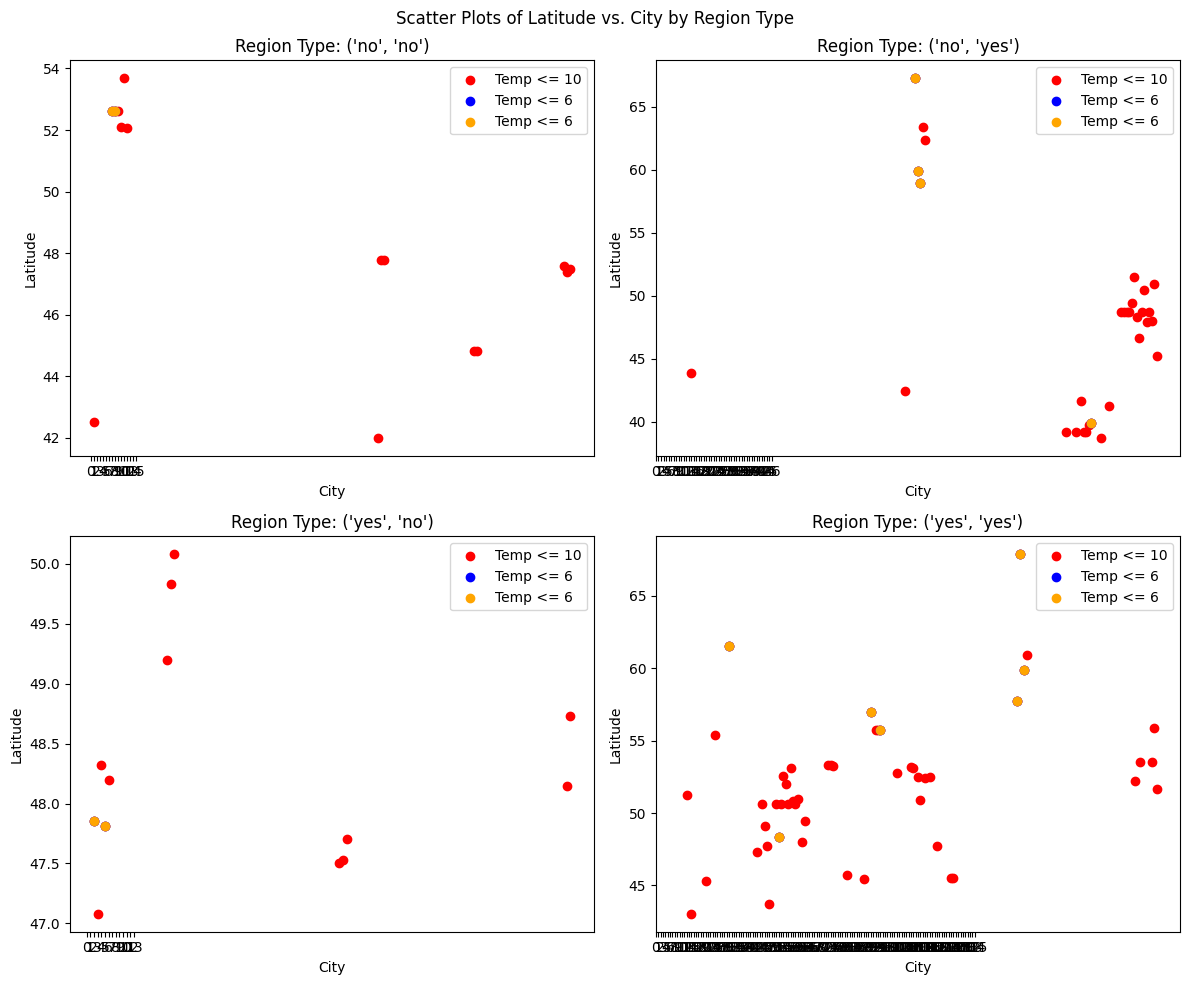

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Scatter Plots of Latitude vs. City by Region Type')
color_thresholds = {'red': 10, 'blue': 6, 'orange': 6}
for i, (region_type, group) in enumerate(df.groupby(['EU', 'coastline'])):
    ax = axs[i // 2, i % 2]
    for color, threshold in color_thresholds.items():
        subset = group[group['temperature'] <= threshold]
        ax.scatter(subset.index, subset['latitude'], c=color, label=f'Temp <= {threshold}')
    ax.set_xticks(range(len(group)))
    ax.set_xticklabels(range(len(group)))
    ax.set_title(f'Region Type: {region_type}')
    ax.set_xlabel('City')
    ax.set_ylabel('Latitude')
    ax.legend()

plt.tight_layout()
plt.show()

 Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above.
Each subplot should be a scatter plot of Latitude (y-axis) vs. City (x-axis), where the color of the plot points should be based on the temperature values: ‘red’ for temperatures above 10, ‘blue’ for temperatures below 6 and ‘orange for temperatures between 6 and 10 (both inclusive). For each subplot, set xticks to an array of numbers from 0 to n-1 (both inclusive), where n is the total number of cities in each region type. This represents each city as a number between 0 and n-1.